### House Price Prediction Using Machine Learning
Supervised learning , Model: Linear Regression
steps we'll need to follow:


1.   Import Libraries
2.   Load Dataset
1.   Data Preprocessing
2.   Split Dataset
1.   Train the Model
2.   Evaluate the Model






In [1]:
import pandas as pd #used for data analysis
import numpy as np  #used for performing mathematical operations on arrays

import matplotlib.pyplot as plt  #is used to plot visualization graphs
import seaborn as sns  #used for data visualization and data anlysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [14]:
file_path = '/content/house_price_dataset_not-clean.csv'
df = pd.read_csv(file_path)
df_Tour = df.copy()
print(f'there are {df_Tour.shape[0]} rows , and {df_Tour.shape[1]} columns')

there are 4954 rows , and 16 columns


In [15]:
df_Tour.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket,crime_rate_index,room_size,property_value
0,201 sqm,177 sqm,3,1,No,Yes,Yes,No,3.3km,Yes,10 Years,No,6.8 km,0.90,small,165432
1,196 sqm,182 sqm,4,3,Yes,Yes,No,Yes,1.2km,Yes,11 Years,No,4.1 km,1.42,medium,187043
2,198 sqm,182 sqm,4,4,Yes,Yes,No,Yes,5.9km,No,20 Years,No,2.1 km,4.12,medium,148658
3,178 sqm,166 sqm,2,3,No,Yes,No,No,5.9km,No,5 Years,No,0.7 km,4.36,small,123785
4,183 sqm,165 sqm,3,1,Yes,Yes,No,No,3.8km,Yes,8 Years,No,0.7 km,0.42,small,156470


In [16]:
df_Tour.tail()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket,crime_rate_index,room_size,property_value
4949,297 sqm,261 sqm,4,4,Yes,Yes,Yes,Yes,2.9km,Yes,20 Years,No,4.1 km,3.99,large,235882
4950,302 sqm,282 sqm,4,2,Yes,Yes,Yes,Yes,3.8km,Yes,12 Years,Yes,4.8 km,2.09,large,290995
4951,153 sqm,147 sqm,3,4,Yes,Yes,No,No,3.3km,Yes,7 Years,No,4.7 km,3.98,extra_large,106428
4952,180 sqm,158 sqm,2,1,No,Yes,No,Yes,2.2km,No,1 Years,No,3.4 km,3.75,large,107579
4953,695 sqm,619 sqm,8,6,Yes,Yes,Yes,Yes,0.4km,Yes,5 Years,No,0.4 km,4.64,large,537980


In [17]:
print('number of rows: ', df_Tour.shape[0])
print('number of columns: ', df_Tour.shape[1])
print('features are: ' , df_Tour.columns.tolist())
print('\n')

number of rows:  4954
number of columns:  16
features are:  ['land_size_sqm', 'house_size_sqm', 'no_of_rooms', 'no_of_bathrooms', 'large_living_room', 'parking_space', 'front_garden', 'swimming_pool', 'distance_to_school', 'wall_fence', 'house_age', 'water_front', 'distance_to_supermarket', 'crime_rate_index', 'room_size', 'property_value']




In [18]:
print('Duplicated values are: \n', df_Tour.duplicated().sum())

Duplicated values are: 
 0


In [19]:
print('Missing values are: \n', df_Tour.isnull().sum().sort_values(ascending=False))

Missing values are: 
 water_front                13
room_size                  11
house_age                   8
front_garden                3
wall_fence                  1
land_size_sqm               0
house_size_sqm              0
no_of_rooms                 0
no_of_bathrooms             0
large_living_room           0
parking_space               0
swimming_pool               0
distance_to_school          0
distance_to_supermarket     0
crime_rate_index            0
property_value              0
dtype: int64


In [20]:
df_Tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   land_size_sqm            4954 non-null   object 
 1   house_size_sqm           4954 non-null   object 
 2   no_of_rooms              4954 non-null   int64  
 3   no_of_bathrooms          4954 non-null   int64  
 4   large_living_room        4954 non-null   object 
 5   parking_space            4954 non-null   object 
 6   front_garden             4951 non-null   object 
 7   swimming_pool            4954 non-null   object 
 8   distance_to_school       4954 non-null   object 
 9   wall_fence               4953 non-null   object 
 10  house_age                4946 non-null   object 
 11  water_front              4941 non-null   object 
 12  distance_to_supermarket  4954 non-null   object 
 13  crime_rate_index         4954 non-null   float64
 14  room_size               

In [21]:
# Handling missing values
# Imputation with a specific value
df_Tour['water_front'].fillna('No', inplace=True)

# Backward fill and Forwad fill for the 'room_size' and 'house_age' column
df_Tour['room_size'].fillna(method='bfill', inplace=True)
df_Tour['house_age'].fillna(method='ffill', inplace=True)

# Drop rows where 'front_garden' column has missing values
df_Tour = df_Tour.dropna(subset=['front_garden','wall_fence'])


<ipython-input-21-987d48054ae1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Tour['water_front'].fillna('No', inplace=True)
<ipython-input-21-987d48054ae1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [22]:
print('Missing values are: \n', df_Tour.isnull().sum().sort_values(ascending=False))

Missing values are: 
 land_size_sqm              0
house_size_sqm             0
no_of_rooms                0
no_of_bathrooms            0
large_living_room          0
parking_space              0
front_garden               0
swimming_pool              0
distance_to_school         0
wall_fence                 0
house_age                  0
water_front                0
distance_to_supermarket    0
crime_rate_index           0
room_size                  0
property_value             0
dtype: int64


In [23]:
# Convert to numerical values
df_Tour['land_size_sqm'] = df_Tour['land_size_sqm'].str.extract('(\d+)').astype(int)
df_Tour['house_size_sqm'] = df_Tour['house_size_sqm'].str.extract('(\d+)').astype(int)
df_Tour['distance_to_school'] = df_Tour['distance_to_school'].str.extract('(\d+)').astype(int)
df_Tour['house_age'] = df_Tour['house_age'].str.extract('(\d+)').astype(int)
df_Tour['distance_to_supermarket'] = df_Tour['distance_to_supermarket'].str.extract('(\d+)').astype(int)
df_Tour.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket,crime_rate_index,room_size,property_value
0,201,177,3,1,No,Yes,Yes,No,3,Yes,10,No,6,0.90,small,165432
1,196,182,4,3,Yes,Yes,No,Yes,1,Yes,11,No,4,1.42,medium,187043
2,198,182,4,4,Yes,Yes,No,Yes,5,No,20,No,2,4.12,medium,148658
3,178,166,2,3,No,Yes,No,No,5,No,5,No,0,4.36,small,123785
4,183,165,3,1,Yes,Yes,No,No,3,Yes,8,No,0,0.42,small,156470


In [24]:
# One Hot encoding
df_Tour = pd.get_dummies(df_Tour,columns=['large_living_room','parking_space','front_garden','swimming_pool','wall_fence','water_front','room_size']).astype(int)
df_Tour.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket,crime_rate_index,property_value,large_living_room_No,...,swimming_pool_No,swimming_pool_Yes,wall_fence_No,wall_fence_Yes,water_front_No,water_front_Yes,room_size_extra_large,room_size_large,room_size_medium,room_size_small
0,201,177,3,1,3,10,6,0,165432,1,...,1,0,0,1,1,0,0,0,0,1
1,196,182,4,3,1,11,4,1,187043,0,...,0,1,0,1,1,0,0,0,1,0
2,198,182,4,4,5,20,2,4,148658,0,...,0,1,1,0,1,0,0,0,1,0
3,178,166,2,3,5,5,0,4,123785,1,...,1,0,1,0,1,0,0,0,0,1
4,183,165,3,1,3,8,0,0,156470,0,...,1,0,0,1,1,0,0,0,0,1


In [25]:
# Normalize
mean = df_Tour.mean()[0]
stddev = df_Tour.std()[0]
df_Tour = (df_Tour - df_Tour.mean())/df_Tour.std()

df_Tour.head()

<ipython-input-25-dc1447eb3267>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean = df_Tour.mean()[0]
<ipython-input-25-dc1447eb3267>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stddev = df_Tour.std()[0]


,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket,crime_rate_index,property_value,large_living_room_No,...,swimming_pool_No,swimming_pool_Yes,wall_fence_No,wall_fence_Yes,water_front_No,water_front_Yes,room_size_extra_large,room_size_large,room_size_medium,room_size_small
0,-0.476736,-0.573954,-0.497892,-1.373330,0.022518,-0.227174,1.513740,-1.451807,-0.406318,1.619626,...,1.271201,-1.271201,-0.765117,0.765117,0.226204,-0.226204,-0.564384,-0.748938,-0.646097,2.927923
1,-0.525206,-0.521097,0.132916,-0.124963,-0.981649,-0.069922,0.502196,-0.868492,-0.166322,-0.617302,...,-0.786499,0.786499,-0.765117,0.765117,0.226204,-0.226204,-0.564384,-0.748938,1.547442,-0.341470
2,-0.505818,-0.521097,0.132916,0.499221,1.026685,1.345352,-0.509348,0.881455,-0.592598,-0.617302,...,-0.786499,0.786499,1.306726,-1.306726,0.226204,-0.226204,-0.564384,-0.748938,1.547442,-0.341470
3,-0.699698,-0.690241,-1.128699,-0.124963,1.026685,-1.013438,-1.520892,0.881455,-0.868820,1.619626,...,1.271201,-1.271201,1.306726,-1.306726,0.226204,-0.226204,-0.564384,-0.748938,-0.646097,2.927923
4,-0.651228,-0.700813,-0.497892,-1.373330,0.022518,-0.541680,-1.520892,-1.451807,-0.505844,-0.617302,...,1.271201,-1.271201,-0.765117,0.765117,0.226204,-0.226204,-0.564384,-0.748938,-0.646097,2.927923


In [26]:
# Split dataset
X = df_Tour.drop('property_value', axis=1)
y = df_Tour['property_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the splits
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("Y_train:\n", y_train)
print("Y_test:\n", y_test)

X_train:
       land_size_sqm  house_size_sqm  no_of_rooms  no_of_bathrooms  \
3670       0.890120        0.641775     1.394531         2.371772   
1020      -0.631840       -0.595097    -0.497892        -0.749147   
3229      -0.893578       -0.795957    -0.497892        -0.124963   
1029      -0.622146       -0.700813    -1.128699        -1.373330   
2910      -0.195609       -0.013662     0.132916         0.499221   
...             ...             ...          ...              ...   
4430      -0.234386       -0.098234     0.132916         1.123405   
466        0.948284        0.842634     0.763723         1.123405   
3095      -0.040505       -0.151092     0.763723        -0.124963   
3776       0.260009        0.366914     0.132916         0.499221   
860       -0.457348       -0.489382     0.132916         1.123405   

      distance_to_school  house_age  distance_to_supermarket  \
3670           -0.479566   1.030847                -0.003576   
1020           -1.483733  -1.3279

In [27]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print("Actual values:", y_test)
print('\n')
print("Predicted values:", y_pred)
print('\n')

Mean Squared Error: 0.00935168152033811
R-squared: 0.9898361470165783
Actual values: 230    -1.160833
4859   -0.800611
1954    0.204882
3466   -0.649213
1844    0.178030
          ...   
80     -0.779700
803    -0.566834
3848   -0.266337
2092    0.147968
3540   -0.839468
Name: property_value, Length: 990, dtype: float64


Predicted values: [-1.34906572e+00 -9.11842609e-01  9.28556702e-02 -6.10464772e-01
  1.93999231e-01 -9.59528509e-01  2.40054629e-01 -1.30911735e+00
  1.44031843e-01 -1.12256028e+00  2.21928712e+00 -1.52936906e+00
  4.15342866e+00  6.55056622e-01  2.49137466e-01 -7.26990801e-01
  1.35399208e+00  1.50291084e+00  6.14795123e-01  5.31418384e-02
 -1.07030855e+00  2.85377678e-01  6.97605720e-01 -1.33614366e+00
  7.68762413e-02 -8.08325648e-01 -4.82747473e-01  6.89526335e-01
 -1.79566952e-01  4.53694170e-01  9.62417314e-02 -1.17283950e+00
  2.85265966e-01 -6.69296018e-01  8.99584440e-01  8.87841102e-01
 -5.69430082e-01 -2.79376459e-02  3.34461081e-01  3.86178177e-01
  3.5009

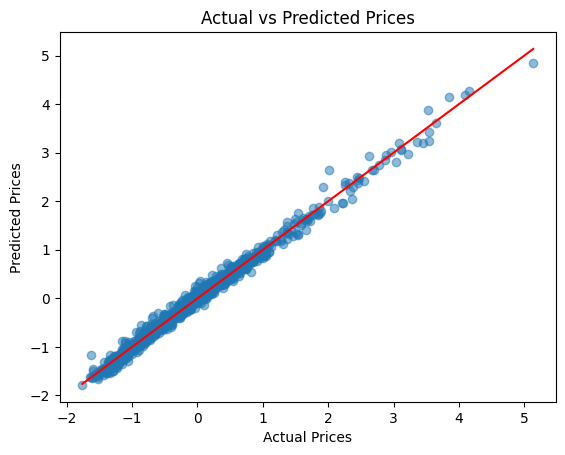

In [28]:
# Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


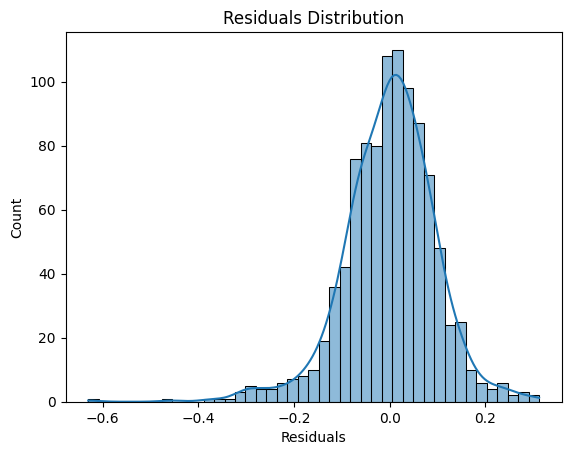

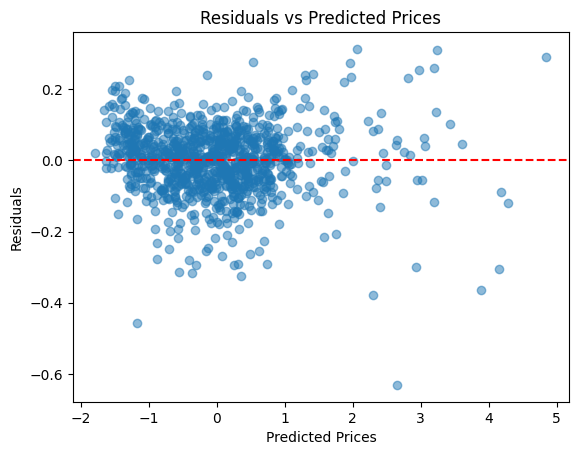

In [29]:
# Calculate residuals
residuals = y_test - y_pred

# Plot Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

# Residuals Scatter Plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
